### Realizar un dendograma entre los valores del fichero de ejemplo en el año 2019 y 2018 según su comportamiento durante ese periodo.

Para ello se debe considerar la matriz distancias calculadas considerando el valor de cierre de cada día .

He subido un fichero en la carpeta T2 (ibex_2020.py) que os puede servir de base.

###### Primero será necesario cargar el programa ibex_2020.py

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

import datetime
import pandas_datareader.data as web
import yfinance as yf
lista_val=["MSFT","AAPL","T","GOOGL", "HPQ","VZ","CVX","ORAN","VOD","JPM","BBVA","RBS","BK"]

def lista_google(dstart,dend):
    listita = []
    for i in range(0, len (lista_val)):
        f = yf.download(lista_val[i], dstart,dend)
        listita.append(f.iloc[:]['Close'])
    return listita
lis=lista_google(datetime.datetime(2018, 1, 1),datetime.datetime(2019, 12, 31))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


#### Ahora se procede a realizar el ejercicio, donde se pretende realizar un dendograma con el valor de las empresas más similares entre ellas (que tengan la misma tendencia) 

In [2]:
np.divide(lis[0], np.max(lis[0])).tolist() 
norm = [] # lista donde almacenamos los datos normalizados
for x in lis:
    norm.append(np.divide(x, np.max(x)).tolist())

for j in range(1,len(norm[0])):
    norm[0][j]/norm[0][j-1]

#variacion producida en los datos
var = []
for i in range(0, len(norm)):
    variacion = []
    for j in range(1,len(norm[i])):
        variacion.append(norm[i][j]/norm[i][j-1])
    var.append(variacion)


    
X = np.array(var)


##### Posterormente se ha definido el dendograma siguiendo el siguiente ejemplo: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

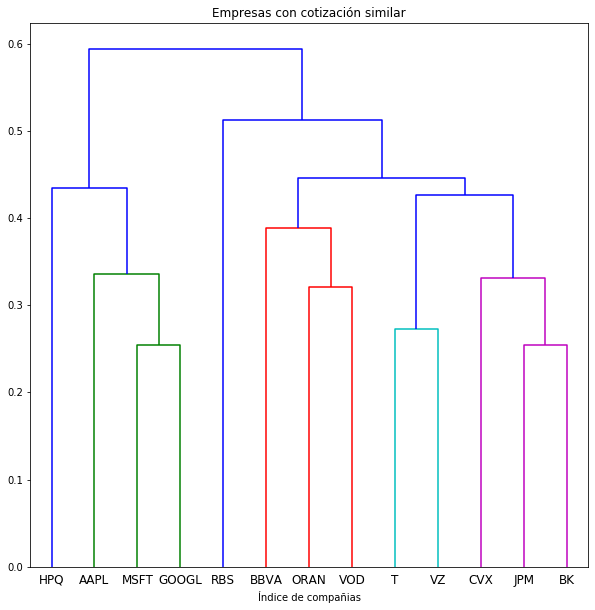

In [3]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.rcParams['figure.figsize'] = [10, 10] #modifico el tamaño por que por defecto sale muy pequeño
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Empresas con cotización similar')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level',labels=lista_val)
plt.xlabel("Índice de compañias")
plt.show()